In [2]:
####################################################################
# Example : Kalman Filter in 1D Time Sequence Data
# Author : Wang Kang
# Date : 2020/1/4
# Email : prince.love@live.cn
# References :
# https://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html
####################################################################

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [115]:
x = None # estimated state mean
P = 1 # estimated state variance
F = 1 # transition matrix
H = 1 # measurement matrix
Q = 1e-6 # process noise variance
R = 1e-3 # measurement noise variance

In [116]:
steps = 100
realstate = np.zeros((steps,1))
predictions = np.zeros((steps,1))
measurements = np.zeros((steps,1))

In [117]:
for t in range(0,steps):
    
    # Measurement
    rt = 1 / (1 + np.exp(-t)) # sigmoid function
    zt = rt + np.random.normal(0,0.05,1) # simulate noise
    
    # If Kalman system is not initialized, assign first observed value to state
    if x is None:
        x = zt
        
    # Prediction
    xt = F * x
    Pt = F * P + Q
    
    # Update
    K = Pt / (Pt - R)
    x = xt + K * (zt - H*xt)
    P = (1 - K) * P
    
    # Record
    realstate[t] = rt
    predictions[t] = x
    measurements[t] = zt

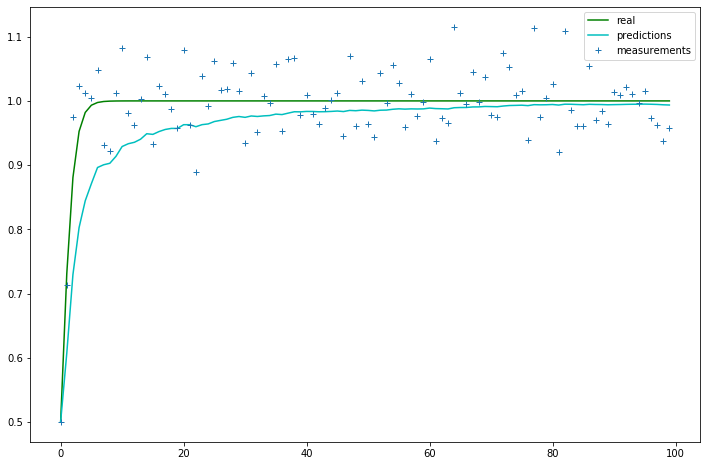

In [118]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.plot(realstate, 'g', label='real')
plt.plot(predictions, 'c', label='predictions')
plt.plot(measurements, '+', label='measurements')
plt.legend()